In [2]:
from example_agents import KissanMigo
from example_tools import S2SearchTool, AddUserTool, AddPlotTool
from langchain.llms import OpenAI
from example_agents.config import config
from steamship import Steamship
import geopandas as gpd
client = Steamship()
OPENAI_KEY = config()

In [3]:
gdf = gpd.read_file('./testing_geojson.geojson')

<Axes: >

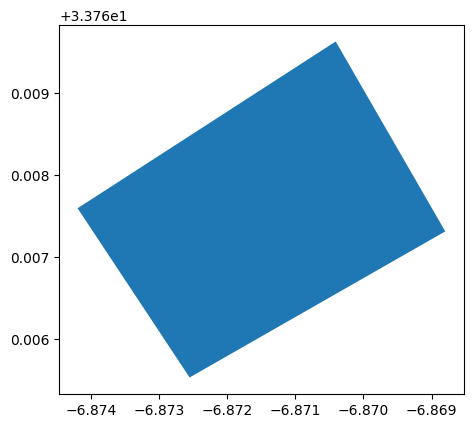

In [4]:
gdf.plot()

In [7]:
gdf.geometry[0].wkt

'MULTIPOLYGON (((-6.872555105587085 33.76552828521749, -6.874200847375522 33.767595335990904, -6.870408485863039 33.769632596237756, -6.868798521070004 33.76731279242417, -6.872555105587085 33.76552828521749)))'

<b>Structured input ReAct</b>
<br>The structured tool chat agent is capable of using multi-input tools. Older agents are configured to specify an action input as a single string, but this agent can use a tools' argument schema to create a structured action input. This is useful for more complex tool usage, like precisely navigating around a browser. 

In [8]:
llm = OpenAI(client=client, openai_api_key=OPENAI_KEY, model='text-davinci-003', temperature=0)

tools = [S2SearchTool()]

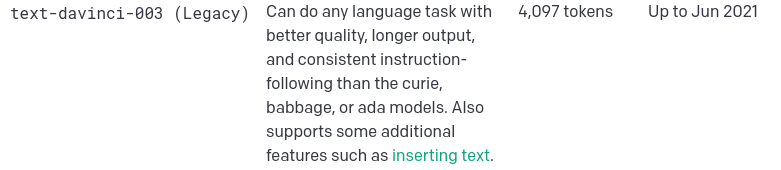

In [9]:
kissanmigo = KissanMigo(tools, llm)



> Entering new  chain...

Action:
```
{
  "action": "s2_image",
  "action_input": {
    "polygon": "MULTIPOLYGON (((-6.872555105587085 33.76552828521749, -6.874200847375522 33.767595335990904, -6.870408485863039 33.769632596237756, -6.868798521070004 33.76731279242417, -6.872555105587085 33.76552828521749)))",
    "vi": "NDVI",
    "start_date": "2023-06-01",
    "end_date": "2023-07-01"
  }
}
```



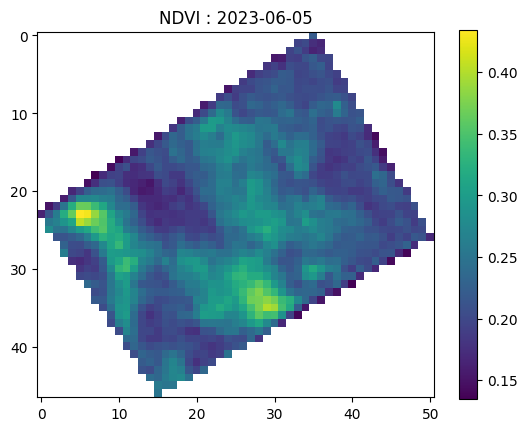


Observation: None
Thought: I need to use the s2_image tool
Action:
```
{
  "action": "s2_image",
  "action_input": {
    "polygon": "MULTIPOLYGON (((-6.872555105587085 33.76552828521749, -6.874200847375522 33.767595335990904, -6.870408485863039 33.769632596237756, -6.868798521070004 33.76731279242417, -6.872555105587085 33.76552828521749)))",
    "vi": "NDVI",
    "start_date": "2023-06-01",
    "end_date": "2023-07-01"
  }
}
```



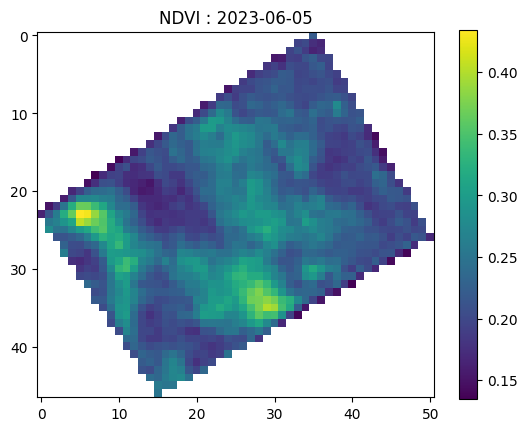


Observation: None
Thought: I have the tool output
Action:
```
{
  "action": "Final Answer",
  "action_input": "Here is the NDVI map of the given plot between 2023-06-01 and 2023-07-01: [INSERT MAP HERE]"
}
```



> Finished chain.


'Here is the NDVI map of the given plot between 2023-06-01 and 2023-07-01: [INSERT MAP HERE]'

In [15]:
kissanmigo.agent.run("Give me NDVI map of the following plot \
                     MULTIPOLYGON (((-6.872555105587085 33.76552828521749, -6.874200847375522 33.767595335990904, -6.870408485863039 33.769632596237756, -6.868798521070004 33.76731279242417, -6.872555105587085 33.76552828521749)))\
                     between 2023-06-01 and 2023-07-01")

In [17]:
kissanmigo.agent.run('how can I start using you')



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "Hi there! To get started, please provide me with a Polygon or MultiPolygon of your farm or plot, a vegetation index (VI) you would like to use, and a range of dates. I can then generate a vegetation index map from Sentinel2 satellite imagery for you."
}
```


> Finished chain.


'Hi there! To get started, please provide me with a Polygon or MultiPolygon of your farm or plot, a vegetation index (VI) you would like to use, and a range of dates. I can then generate a vegetation index map from Sentinel2 satellite imagery for you.'

In [11]:
kissanmigo.agent.run('What satellite imagery do you provide?')



> Entering new  chain...
Action:
```
{
  "action": "s2_image",
  "action_input": {
    "polygon": {
      "title": "Polygon",
      "type": "string"
    },
    "vi": {
      "title": "Vi",
      "type": "string"
    },
    "start_date": {
      "title": "Start Date",
      "type": "string"
    },
    "end_date": {
      "title": "End Date",
      "type": "string"
    }
  }
}
```


TypeError: Expected bytes or string, got dict

In [12]:
kissanmigo.agent.run('What satellite imagery do you work with?')



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "We work with Sentinel2 satellite imagery and can provide vegetation index maps from it."
}
```


> Finished chain.


'We work with Sentinel2 satellite imagery and can provide vegetation index maps from it.'

In [13]:
kissanmigo.agent.run('What can you provide?')



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "I can provide a vegetation index map from Sentinel2 satellite imagery. Please provide a Polygon or MultiPolygon of your farm or plot and a range of dates."
}
```


> Finished chain.


'I can provide a vegetation index map from Sentinel2 satellite imagery. Please provide a Polygon or MultiPolygon of your farm or plot and a range of dates.'

In [16]:
kissanmigo.agent.run('Who are you?')



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "I am a chatbot designed to help you with your questions about satellite imagery."
}
```


> Finished chain.


'I am a chatbot designed to help you with your questions about satellite imagery.'